# Choice of Nodes for Polynomial Interpolation

In [2]:
import numpy as np
import numpy.linalg as la

from matplotlib.pyplot import (
    clf, plot, show, xlim, ylim,
    get_current_fig_manager, gca, draw, connect)

Choose a function below:

In [3]:
func = "runge"

if func == "sin":
    def f(x):
        return np.sin(5*x)
elif func == "jump":
    def f(x):
        result = 0*x
        result.fill(-1)
        result[x > 0] = 1
        return result
elif func == "runge":
    def f(x):
        return 1/(1+25*x**2)
else:
    raise RuntimeError("unknown function '%s'" % func)

Run this cell to play with the node placement toy:

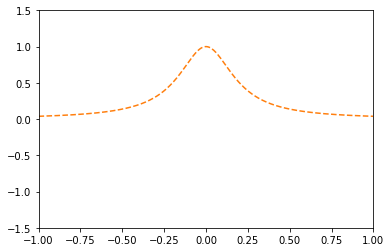

In [4]:
x_points = []
y_points = []
deg = [1]

def update_plot():
    clf()
    xlim([-1, 1])
    ylim([-1.5, 1.5])
    gca().set_autoscale_on(False)
    plot(x_points, y_points, 'o')

    x = np.linspace(-1, 1, 500)
    plot(x, f(x), "--")

    if len(x_points) >= deg[0]+1:
        eval_points = np.linspace(-1, 1, 500)
        poly = np.poly1d(np.polyfit(
            np.array(x_points),
            np.array(y_points), deg[0]))
        plot(eval_points, poly(eval_points), "-")


def click(event):
    """If the left mouse button is pressed: draw a little square. """
    tb = get_current_fig_manager().toolbar
    if event.button == 1 and event.inaxes and tb.mode == '':
        x_points.append(event.xdata)
        x_ary = np.array([event.xdata])
        y_ary = f(x_ary)
        y_points.append(y_ary[0])

    if event.button == 3 and event.inaxes and tb.mode == '':
        if len(x_points) >= deg[0]+2:
            deg[0] += 1

    update_plot()
    draw()

update_plot()
connect('button_press_event', click)
show()